# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_data = study_results.copy()
mice_data = mice_data.merge(mouse_metadata,"inner", "Mouse ID")
# Display the data table for preview
mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [58]:
# Checking the number of mice.
mice_number= len(set(mice_data["Mouse ID"].to_list()))
mice_number

249

In [59]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups= mice_data.groupby(by=["Mouse ID", "Timepoint"]).count()
dups= dups["Age_months"][dups["Age_months"]>1]
dups

Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
Name: Age_months, dtype: int64

In [60]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse= mice_data[mice_data["Mouse ID"]=="g989"]
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data_clean= mice_data[mice_data["Mouse ID"]!= "g989"]
mice_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [62]:
# Checking the number of mice in the clean DataFrame.
mice_clean_number= len(set(mice_data_clean["Mouse ID"].to_list()))
mice_clean_number

248

## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_stat= mice_data_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

median_stat= mice_data_clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

varaince_stat= mice_data_clean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

std_stat= mice_data_clean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

sem_stat= mice_data_clean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_stats= pd.concat([mean_stat, median_stat, varaince_stat, std_stat, sem_stat], axis=1)
summary_stats.columns= ["Mean Tumor Volume", "Median Tumor Volume", "Variance Tumor Volume", "STD Tumor Volume", "SEM Tumor Volume"]
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,STD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_2= mice_data_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_stats_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot: xlabel='Drug Regimen'>

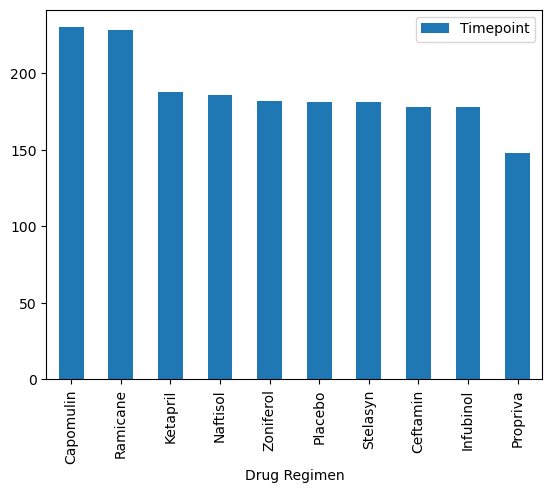

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_graph_1 = mice_data_clean.groupby("Drug Regimen").agg({"Timepoint": "count"})
'''
Sorted bar graph data
'''
bar_graph_1.sort_values("Timepoint",ascending=False).plot(kind="bar")

<BarContainer object of 10 artists>

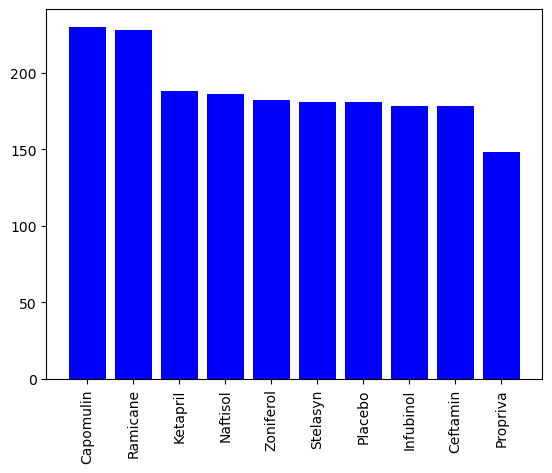

In [66]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_count= mice_data_clean["Drug Regimen"].value_counts()

y_axis = mice_count.values
x_axis = mice_count.index.values

plt.xticks(rotation=90)
plt.bar(x_axis,y_axis, color='b', alpha=1.0, align='center')




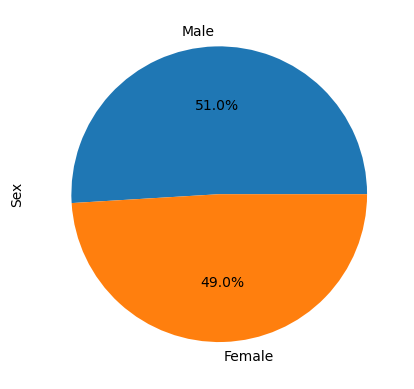

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender= mice_data_clean["Sex"].value_counts()
mice_gender.plot.pie(autopct= '%1.1f%%')
plt.show()

([<matplotlib.patches.Wedge at 0x2987a1cca00>,
 [Text(-0.034551802045584716, 1.0994572174374968, 'Male'),
  Text(0.03455180204558458, -1.0994572174374968, 'Female')],
 [Text(-0.018846437479409842, 0.5997039367840891, '51.0%'),
  Text(0.01884643747940977, -0.5997039367840891, '49.0%')])

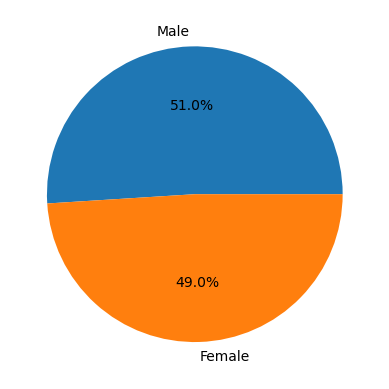

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders= ['Male','Female']
percentages= [51, 49]
plt.pie(percentages, labels=genders, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_data= mice_data_clean.loc[mice_data_clean['Drug Regimen']=='Capomulin',:]
ramicane_data= mice_data_clean.loc[mice_data_clean['Drug Regimen']=='Ramicane',:]
infubinol_data= mice_data_clean.loc[mice_data_clean['Drug Regimen']=='Infubinol',:]
ceftamin_data= mice_data_clean.loc[mice_data_clean['Drug Regimen']=='Ceftamin',:]

# Start by getting the last (greatest) timepoint for each mouse
last_capomulin_data= capomulin_data.groupby('Mouse ID').last()['Timepoint']
last_ramicane_data= ramicane_data.groupby('Mouse ID').last()['Timepoint']
last_infubinol_data= infubinol_data.groupby('Mouse ID').last()['Timepoint']
last_ceftamin_data= ceftamin_data.groupby('Mouse ID').last()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_capomulin_data_vol= pd.DataFrame(last_capomulin_data)
last_ramicane_data_vol= pd.DataFrame(last_ramicane_data)
last_infubinol_data_vol= pd.DataFrame(last_infubinol_data)
last_ceftamin_data_vol= pd.DataFrame(last_ceftamin_data)

capomulin_merged= pd.merge(last_capomulin_data_vol, mice_data_clean, on= ('Mouse ID', 'Timepoint'), how= 'left')
ramicane_merged= pd.merge(last_ramicane_data_vol, mice_data_clean, on= ('Mouse ID', 'Timepoint'), how= 'left')
infubinol_merged= pd.merge(last_infubinol_data_vol, mice_data_clean, on= ('Mouse ID', 'Timepoint'), how= 'left')
ceftamin_merged= pd.merge(last_ceftamin_data_vol, mice_data_clean, on= ('Mouse ID', 'Timepoint'), how= 'left')

capomulin_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [77]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capomulin_tumor_vol= capomulin_merged['Tumor Volume (mm3)']
ramicane_tumor_vol= ramicane_merged['Tumor Volume (mm3)']
infubinol_tumor_vol= infubinol_merged['Tumor Volume (mm3)']
ceftamin_tumor_vol= ceftamin_merged['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

#Capolmulin

cap_quartiles= capomulin_tumor_vol.quantile([.25,.5,.75])
cap_lowerq= cap_quartiles[.25]
cap_upperq= cap_quartiles[.75]
cap_iqr= cap_upperq-cap_lowerq

cap_lower_outlier= cap_lowerq - (1.5*cap_iqr)
cap_upper_outlier= cap_upperq + (1.5*cap_iqr)

print(f"The lower quartile of tumor size with the Capomulin treatment is: {cap_lowerq}")
print(f"The upper quartile of tumor size with the Capomulin treatment is: {cap_upperq}")
print(f"The interquartile range of tumor size with the Capomulin treatment is: {cap_iqr}")
print(f"The median of tumor size with the Capomulin treatment is: {cap_quartiles[0.5]} ")
print(f"Any values below {cap_lower_outlier} or above {cap_upper_outlier} may be considered outliers.")

The lower quartile of tumor size with the Capomulin treatment is: 32.37735684
The upper quartile of tumor size with the Capomulin treatment is: 40.1592203
The interquartile range of tumor size with the Capomulin treatment is: 7.781863460000004
The median of tumor size with the Capomulin treatment is: 38.1251644 
Any values below 20.70456164999999 or above 51.83201549 may be considered outliers.


In [79]:
#Ramicane

ram_quartiles= ramicane_tumor_vol.quantile([.25,.5,.75])
ram_lowerq= ram_quartiles[.25]
ram_upperq= ram_quartiles[.75]
ram_iqr= ram_upperq-ram_lowerq

ram_lower_outlier= ram_lowerq - (1.5*ram_iqr)
ram_upper_outlier= ram_upperq + (1.5*ram_iqr)

print(f"The lower quartile of tumor size with the Ramicane treatment is: {ram_lowerq}")
print(f"The upper quartile of tumor size with the Ramicane treatment is: {ram_upperq}")
print(f"The interquartile range of tumor size with the Ramicane treatment is: {ram_iqr}")
print(f"The median of tumor size with the Ramicane treatment is: {ram_quartiles[0.5]} ")
print(f"Any values below {ram_lower_outlier} or above {ram_upper_outlier} may be considered outliers.")

The lower quartile of tumor size with the Ramicane treatment is: 31.56046955
The upper quartile of tumor size with the Ramicane treatment is: 40.65900627
The interquartile range of tumor size with the Ramicane treatment is: 9.098536719999998
The median of tumor size with the Ramicane treatment is: 36.56165229 
Any values below 17.912664470000003 or above 54.30681135 may be considered outliers.


In [81]:
#Ceftamin

ceft_quartiles= ceftamin_tumor_vol.quantile([.25,.5,.75])
ceft_lowerq= ceft_quartiles[.25]
ceft_upperq= ceft_quartiles[.75]
ceft_iqr= ceft_upperq-ceft_lowerq

ceft_lower_outlier= ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_outlier= ceft_upperq + (1.5*ceft_iqr)

print(f"The lower quartile of tumor size with the Ceftamin treatment is: {ceft_lowerq}")
print(f"The upper quartile of tumor size with the Ceftamin treatment is: {ceft_upperq}")
print(f"The interquartile range of tumor size with the Ceftamin treatment is: {ceft_iqr}")
print(f"The median of tumor size with the Ceftamin treatment is: {ceft_quartiles[0.5]} ")
print(f"Any values below {ceft_lower_outlier} or above {ceft_upper_outlier} may be considered outliers.")

The lower quartile of tumor size with the Ceftamin treatment is: 48.72207785
The upper quartile of tumor size with the Ceftamin treatment is: 64.29983003
The interquartile range of tumor size with the Ceftamin treatment is: 15.577752179999997
The median of tumor size with the Ceftamin treatment is: 59.85195552 
Any values below 25.355449580000002 or above 87.66645829999999 may be considered outliers.


In [82]:
#Infubinol

inf_quartiles= infubinol_tumor_vol.quantile([.25,.5,.75])
inf_lowerq= inf_quartiles[.25]
inf_upperq= inf_quartiles[.75]
inf_iqr= inf_upperq-inf_lowerq

inf_lower_outlier= inf_lowerq - (1.5*inf_iqr)
inf_upper_outlier= inf_upperq + (1.5*inf_iqr)

print(f"The lower quartile of tumor size with the infubinol treatment is: {inf_lowerq}")
print(f"The upper quartile of tumor size with the infubinol treatment is: {inf_upperq}")
print(f"The interquartile range of tumor size with the infubinol treatment is: {inf_iqr}")
print(f"The median of tumor size with the infubinol treatment is: {inf_quartiles[0.5]} ")
print(f"Any values below {inf_lower_outlier} or above {inf_upper_outlier} may be considered outliers.")

The lower quartile of tumor size with the infubinol treatment is: 54.04860769
The upper quartile of tumor size with the infubinol treatment is: 65.52574285
The interquartile range of tumor size with the infubinol treatment is: 11.477135160000003
The median of tumor size with the infubinol treatment is: 60.16518046 
Any values below 36.83290494999999 or above 82.74144559000001 may be considered outliers.


<function matplotlib.pyplot.show(close=None, block=None)>

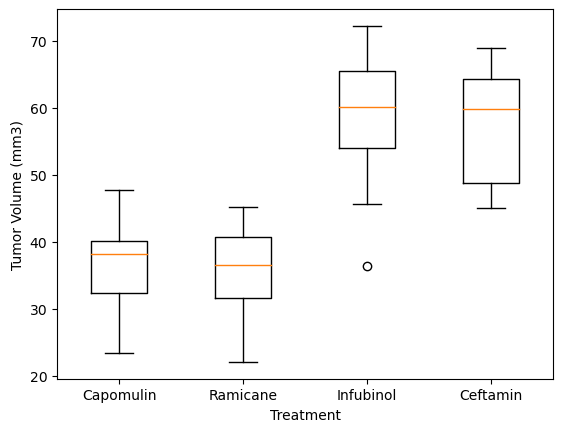

In [92]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot= [capomulin_tumor_vol, ramicane_tumor_vol, infubinol_tumor_vol, ceftamin_tumor_vol]
fig, ax= plt.subplots()

plt.xlabel("Treatment")
plt.ylabel('Tumor Volume (mm3)')
ax.boxplot(box_plot, labels= treatment_list)

plt.show

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

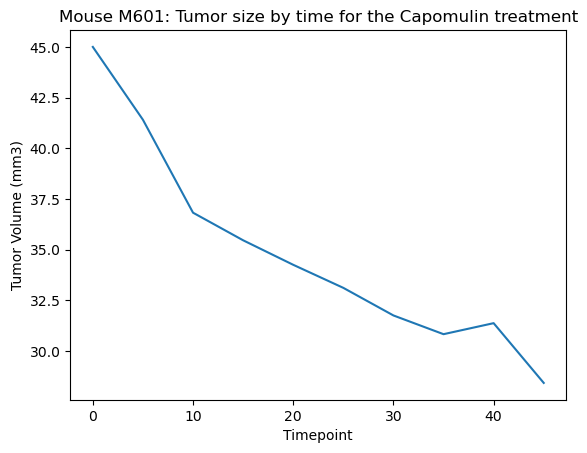

In [116]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_line_data= capomulin_data.loc[capomulin_data['Mouse ID']=='m601']
cap_line_data

cap_x_axis= cap_line_data['Timepoint']
cap_y_axis= cap_line_data['Tumor Volume (mm3)']

fig1,ax1= plt.subplots()

plt.title('Mouse M601: Tumor size by time for the Capomulin treatment')
plt.plot(cap_x_axis, cap_y_axis)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

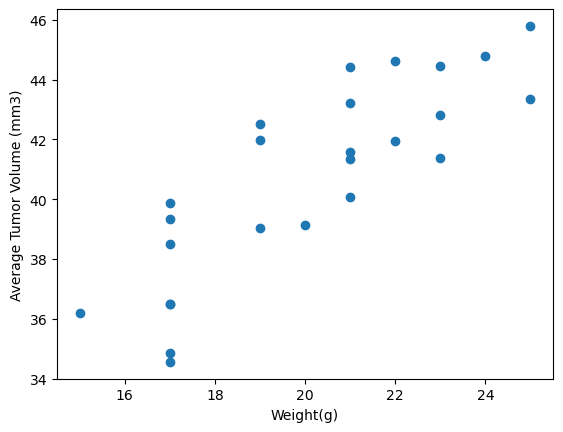

In [118]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_vol= capomulin_data.groupby(['Mouse ID']).mean()

fig2,ax2= plt.subplots()

plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

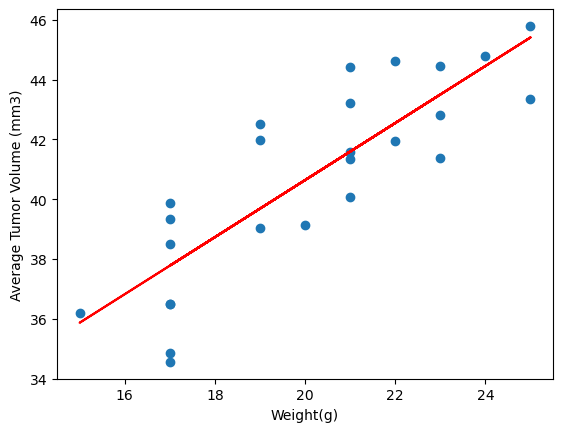

In [124]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cc= st.pearsonr(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
lin_reg= st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
lin_reg

slope=0.9544396890241048
intercept=21.552160532685008

y=avg_tumor_vol['Weight (g)']*slope + intercept

plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.plot(avg_tumor_vol['Weight (g)'], y, color='r')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show

lin_reg

In [126]:
# Creating .txt file with the data analysis

l1="It is clear that when using the Capomulin or Ramicane treatments, the tumor was significantly smaller than the other mice tumors using other treatments."
l2= "Additionally, we can conclude that there is a postive correlation between the weight of the mouse to the tumor size. We can conclude that from viewing the scatterplot and the r-value, which is equalt to 0.842 rounded"
l3= "Another observation we can make is that the Ceftamin treatment shows inconsistent results. We can conclude that from the higher IQR calculation, meaning the data points are more scattered "

with open ('Written Analysis README', 'w+') as file:
    file.writelines([l1,l2,l3])